## CA 2 - Review of Agriculture in Ireland

### Organic food production



In [1]:
# Importing the libraries

# libraries for graphics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# create tables
from tabulate import tabulate

#graphics for calculations
import numpy as np
import pandas as pd

# libraries for analysis
import datetime 
import statistics
import pylab

import scipy as scipy
from scipy import stats
from scipy.stats import binom
from scipy.stats import poisson
import statsmodels.api as sm
from statsmodels.formula.api import ols




###  Local Notebook Functions 

In [2]:
def fill_empty_cells(data_frame):
    # fill an na cells with 0
    data_frame = data_frame.fillna(0)

    
def change_type(data_frame, col_name):
    # change the type to an int
    data_frame.col_name.astype(int)



### Step 1 - Import the dataframes

Dataframes imported are the overall dataset for the European Economic Community (data includes Iceland / the UK / Norway etc), the datasets for Ireland and Spain.  Spain has been selected as the comparison country based on 2020 milk production.

In [51]:
org_milk_df = pd.read_csv("Datasets/milk_df.csv")

irl_milk_df = pd.read_csv("Datasets/irl_milk_df.csv")
es_milk_df = pd.read_csv("Datasets/es_milk_df.csv")

#es_milk_df.info()

In [27]:
# fill an na cells with 0 to allow for calculation
org_milk_df = org_milk_df.fillna(0)
irl_milk_df = irl_milk_df.fillna(0)
es_milk_df = es_milk_df.fillna(0)

#check on import
#org_milk_df.info()

### Step 2 -  Descriptive Statistics in the Dataframe

#### REFERENCE - https://medium.com/analytics-vidhya/descriptive-statistics-in-data-science-with-illustrations-in-python-efd5ccc152f1

In [7]:
# show descriptive statistics relating
# to the EEC organic milk production dataframe

org_milk_df.describe()

Year         Value
count   742.000000  7.420000e+02
mean   2016.489218  1.161572e+05
std       2.730201  2.149148e+05
min    2012.000000  0.000000e+00
25%    2014.000000  2.156750e+03
50%    2016.500000  1.692250e+04
75%    2019.000000  9.854200e+04
max    2021.000000  1.271853e+06

In [8]:
# show descriptive statistics relating
# to the Irish organic milk production dataframe

#irl_milk_df.describe()

In [9]:
# show descriptive statistics relating
# to the Spanish organic milk production dataframe

#es_milk_df.describe()

In [10]:
# calculate the variance of the 3 datasets

eec_variance = statistics.variance(org_milk_df['Value'])
#irish_variance = statistics.variance(irl_milk_df['Value'])
#spanish_variance = statistics.variance(es_milk_df['Value'])

#print(eec_variance, irish_variance, spanish_variance)
print(eec_variance)

46188364685.114784


In [18]:
from scipy.stats import poisson

In [19]:
# calculate the probabilty of the value of milk produced in a year in the EEC

x = org_milk_df["Value"]

# poisson distribution data for y-axis
y = poisson.pmf(x, mu=.25)
y2 = poisson.pmf(x, mu=.5)
y3 = poisson.pmf(x, mu=.75)

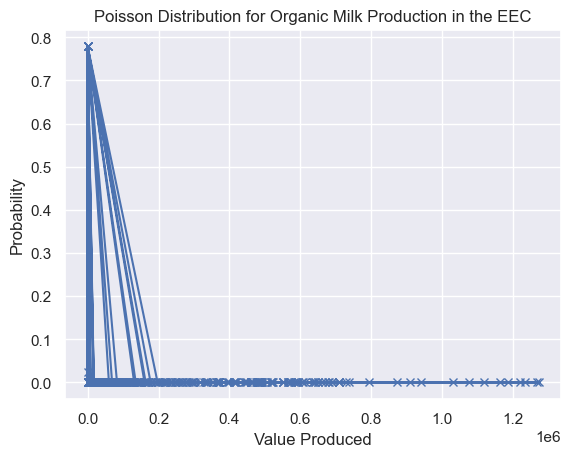

In [20]:
# plotting the graph
plt.plot(x, y, marker='x')
plt.title("Poisson Distribution for Organic Milk Production in the EEC")

# labels for the graph
plt.xlabel('Value Produced')
plt.ylabel('Probability')
# showing the graph
plt.show()

### Test for a Normal Distribution

##### Reference - https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93#:~:text=The%20Shapiro%20Wilk%20test%20is,for%20example%20the%20KS%20test.



TIME_PERIOD
OBS_VALUE
Dairy
Eggs
Honey
Meat
    

In [11]:
# graphic test for a normal distribution on the Irish data

#stats.probplot(irl_milk_df['Value'], dist="norm", plot=pylab)
#plt.title("Probability Plot - Ireland organic milk production")
#pylab.show()


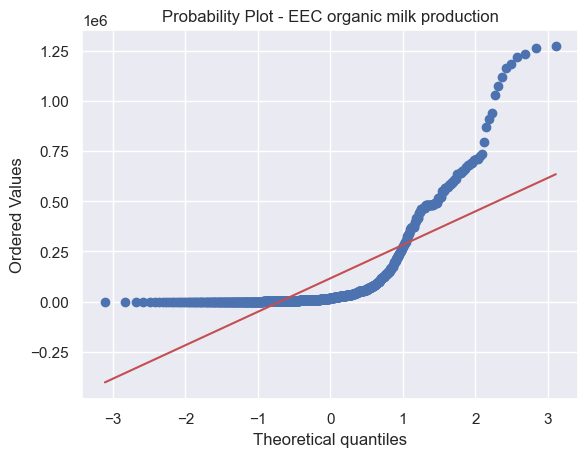

In [12]:
# graphic test for a normal distribution on the full EEC data

stats.probplot(org_milk_df['Value'], dist="norm", plot=pylab)
plt.title("Probability Plot - EEC organic milk production")
pylab.show()


In [13]:
# graphic test for a normal distribution on the Spanish data

#stats.probplot(es_milk_df['Value'], dist="norm", plot=pylab)
#plt.title("Probability Plot - Spanish organic milk production")
#pylab.show()


## Step 3 - Inferential Statistics in the Dataframe

### Shapiro Wilks Test 

In [14]:
# Normalacy test used is shapriro wilks test .. 
# both data samples are less than 50 rows, is the recommended test for this sample size
# https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy

In [30]:
# Shapiro wilk test with 'Value' as target variable for all EEC data

org_shapiro = stats.shapiro(org_milk_df['Value'])

org_shapiro

ShapiroResult(statistic=0.5990283489227295, pvalue=3.381963498465037e-38)

In [31]:
# Shapiro wilk test with 'Value' as target variable for Irish data

irl_shapiro = stats.shapiro(irl_milk_df['Value'])

irl_shapiro

ShapiroResult(statistic=0.9626172780990601, pvalue=0.5703385472297668)

In [32]:
# Shapiro wilk test with 'Value' as target variable

es_shapiro = stats.shapiro(es_milk_df['Value'])

es_shapiro

ShapiroResult(statistic=0.8976963758468628, pvalue=0.007380156312137842)

## Step 4 - Inferential Statistics in the Dataframe

### Test 1 -  ANOVA_Oneway Model

The two-way ANOVA allows for analysis to be carried out on two groups.  For ANOVA Analysis to be carried out, a number of assumptions need to be confirmed namely:

1. dependent variable should be a continious variable
2. independent variable should have two or more categorical independent groups
3. independence of observation
4. no significant outliers
5. dependent variable should follow a normal distribution approximately
6. honegeneity of variances (Levene's test)

The assumptions are discussed in more detail in the attached report

In [34]:
irl_milk_df.head()

Unnamed: 0 agriprod Unit Country  Year   Value Description
0         126    Dairy    T      IE  2013  7012.0    Raw milk
1         127    Dairy    T      IE  2014  7703.0    Raw milk
2         128    Dairy    T      IE  2015  5978.0    Raw milk
3         129    Dairy    T      IE  2016  7335.0    Raw milk
4         130    Dairy    T      IE  2017  9035.0    Raw milk

### Test 2 - Kruskal-Wallis Test 

A Kruskal-Wallis Test compares the median of three or more independent groups to see if there is a statistical difference between them. 

In this instance, the chosen three groups are Ireland / Spain / EU data.  As only 1 value can be tested, each group is equal to the 'Value' column.

- <b>Null Hypothesis</b> - the median value is the same across all the groups
- <b>Alternative Hypothesis</b> - that the median values are not the same across all the groups.

With a p-value result of greater than 0.05, the null hypothesis is rejected, and it is possible to say that there is a statistical difference between the three groups.

#### REFERENCE - https://www.statology.org/kruskal-wallis-test-python/

In [47]:
irish_group = irl_milk_df.Value
spanish_group = es_milk_df.Value
eu_group = org_milk_df.Value

In [48]:
# Kruskal-Wallis Test

results_kruskal = stats.kruskal(irish_group, spanish_group, eu_group)

results_kruskal

KruskalResult(statistic=5.290409876690496, pvalue=0.07099080351093866)

### Test 3 - Two Sample z-test

A One Sample z-test checks if the mean of a population is different to some specified value.

- <b>Null Hypothesis</b> the population mean is equal to some value
- <b>Alternative Hypothesis</b> the population mean is not equal to some value

Assumptions of the z-test are:
1. The data are continuous (not discrete).
2. The data is a simple random sample from the population of interest.
3. The data in the population is approximately normally distributed.
4. The population standard deviation is known.

As the p-value result for the Two Sample z-test is greater than 0.05, it is possible to say that there is a significant difference between the two groups.  Therefore the alternative hypothesis is accepted, and the null hypothesis is rejected.

#### REFERENCE - 
1. https://www.statology.org/z-test-python/
2. Pg Chapter 9, Neil Weiss, Pg 389

In [54]:
from statsmodels.stats.weightstats import ztest as ztest

In [59]:
x1 = irl_milk_df.Value
x2 = es_milk_df.Value
value = 50

In [61]:
# one sample z-test

zTest_result = ztest(x1, x2, value=0)

zTest_result

(-4.242082483785946, 2.214552661545425e-05)

### Test 4 - Wilcoxon rank-sum / Mann-Whitney U Test

when the sample distributions are not normally distributed and the sample sizes are small.  In this instance, the Irish group has 21 datapoints, the Spanish group has 30.

Assumptions of the z-test are:
1. Ordinal or Continuous
2. Indepencence
3. Shape

There are 5 steps involved  ...
1. State the hypotheses
    a. Null hypothesis = the populations are equal
    b. Alternative hpyothesis = the populations are not equal
2. Confirm the significance level
    a. set at 0.05
3. Find the test statistics
4. Reject or fail to reject the null hypothesis
5. Interpret the results

#### REFERENCE
1. https://www.statology.org/mann-whitney-u-test/
2. 

In [64]:
group_1 = irl_milk_df.Value
group_2 = es_milk_df.Value

In [67]:
#perform the Mann-Whitney U test

mann_whitney_results = stats.mannwhitneyu(group_1, group_2, alternative='two-sided')

#mann_whitney_results

### Test 5 - Correlation Test with Pearson correlation coefficient



#### REFERENCE
1. https://www.statology.org/correlation-test-in-python/

In [78]:
from scipy.stats.stats import pearsonr

In [79]:
x = irl_milk_df.Value
y = es_milk_df.Value

In [80]:
#calculation correlation coefficient and p-value between x and y

pearsonr(x, y)

ValueError: x and y must have the same length.

### Test 6 - Linear Regression



#### REFERENCE 
1. https://www.statology.org/linear-regression-python/




In [82]:
import statsmodels.api as sm

In [83]:
y_2 = org_milk_df['Value']

In [86]:
x_2 = org_milk_df[['Country', 'Year']]

In [87]:
#add constant to predictor variables
x = sm.add_constant(x_2)

In [88]:
#fit linear regression model
model = sm.OLS(y_2, x_2).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [89]:
#view model summary
print(model.summary())

NameError: name 'model' is not defined

## Step 5 -  Comparision using Inferential Statistics 

## STATISTICAL RESULTS

In [76]:
table = [['Statistic Results'], 
         ['Shapiro - EEC', org_shapiro],
         ['Shapiro - Ireland', irl_shapiro],
         ['Shapiro - Spain', es_shapiro], 
         ['1 - ANOVA', 'TBC'], 
         ['2 - Kruskal', results_kruskal], 
         ['3 - Mann Whitney', mann_whitney_results],
         ['4 - Correlation Test', 'TBC'],
         ['5 - TBC', 'TBC'],
         ['6 - TBC', 'TBC'],
        ]

In [77]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════╤═══════════════════════════════════════════════════════════════════════════╕
│                   │ Statistic Results                                                         │
╞═══════════════════╪═══════════════════════════════════════════════════════════════════════════╡
│ Shapiro - EEC     │ ShapiroResult(statistic=0.5990283489227295, pvalue=3.381963498465037e-38) │
├───────────────────┼───────────────────────────────────────────────────────────────────────────┤
│ Shapiro - Ireland │ ShapiroResult(statistic=0.9626172780990601, pvalue=0.5703385472297668)    │
├───────────────────┼───────────────────────────────────────────────────────────────────────────┤
│ Shapiro - Spain   │ ShapiroResult(statistic=0.8976963758468628, pvalue=0.007380156312137842)  │
├───────────────────┼───────────────────────────────────────────────────────────────────────────┤
│ 1 - ANOVA         │ TBC                                                                       │
├───────────────────